<div>
<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=220 height=220 align=left class="saturate">

<br>
<font face="Times New Roman">
<div dir=ltr align=center> 
<font color=0F5298 size=6>
    Introduction to Machine Learning <br> <br>
<font size=5>
    Computer Engineering Department <br>
    Spring 2023 <br> <br>
<font color=606060 size=5>
    Homework 1: Practical - Linear Regression <br> <br>
<font color=686880 size=4>
    TAs: Arman Malekzadeh - Yalda Shabanzadeh - Arshia Soltani Moakhar
</div>
____

**This notebook is also available [here](https://colab.research.google.com/drive/1XnWPsyW8eEZv4BTkSMZLsa17TZ85dZfJ?usp=sharing)**

### Full Name : Mohammad Abolnejadian
### Student Number : 98103867
___

In [1005]:
# run this to download the dataset
!wget -O 'dataset.csv' https://www.dropbox.com/s/2ny75tb1ic141yw/assignment1.csv?dl=0

--2023-03-10 19:12:28--  https://www.dropbox.com/s/2ny75tb1ic141yw/assignment1.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/2ny75tb1ic141yw/assignment1.csv [following]
--2023-03-10 19:12:29--  https://www.dropbox.com/s/raw/2ny75tb1ic141yw/assignment1.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0a1c4a24a04e07051db4cb17bc.dl.dropboxusercontent.com/cd/0/inline/B3-T9cuvqkm4Yr0Ta_a2SFmHCMekjdptci8gHipyTgD6oPbv5wobDjK2zGpKbdAEjgdVfW2FhLJv-I9s4CnbxwzBFLId3iw8wXUKZfEU3jHc0lLt7Uikm3ahB730oLD42Vd6S6VkcVJSoeXjvFWcZajNGyt-ckcpqVCKBW8FY5b7gg/file# [following]
--2023-03-10 19:12:29--  https://uc0a1c4a24a04e07051db4cb17bc.dl.dropboxusercontent.com/cd/0/inline/B3-T9cuvqkm4Yr0Ta_a2SFmHCMekjdptci8gHipyTgD6oPbv5wobDjK2zGpKbdA

In [1006]:
# you can use the following libraries
import pandas as pd
# import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
from joblib import dump, load
from matplotlib import pyplot as plt
import os

# Phase 1: Explore

## Sec 1: What do we have here?

load the dataset (as a dataframe) using pandas

In [1007]:
dataset = pd.read_csv("dataset.csv")
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


display the top rows of the dataframe (top 5 is enough)

In [1008]:
dataset.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


print the names of the columns

In [1009]:
list(dataset), len(dataset.columns)

(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], 7)

what values can the `region` column take? print the unique values using pandas

In [1010]:
list(dataset['region'].unique())

['southwest', 'southeast', 'northwest', 'northeast']

get the number of rows in the dataset

In [1011]:
len(dataset.index)

1338

make a new column named `rounded_bmi` by rounding each value of the column `bmi` | keep the `bmi` column

In [1012]:
dataset['rounded_bmi'] = dataset['bmi'].apply(lambda x: round(x))
dataset

,age,sex,bmi,children,smoker,region,charges,rounded_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,28
1,18,male,33.770,1,no,southeast,1725.55230,34
2,28,male,33.000,3,no,southeast,4449.46200,33
3,33,male,22.705,0,no,northwest,21984.47061,23
4,32,male,28.880,0,no,northwest,3866.85520,29
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,31
1334,18,female,31.920,0,no,northeast,2205.98080,32
1335,18,female,36.850,0,no,southeast,1629.83350,37
1336,21,female,25.800,0,no,southwest,2007.94500,26


## Sec 2: Perform EDA

perform EDA on the dataset (e.g., see if there are null values)

In [1013]:
#Quick summary of each column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   charges      1338 non-null   float64
 7   rounded_bmi  1338 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [1014]:
#Statistical analysis for each data series
dataset.describe()

,age,bmi,children,charges,rounded_bmi
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,30.663677
std,14.049960,6.098187,1.205493,12110.011237,6.096007
min,18.000000,15.960000,0.000000,1121.873900,16.000000
25%,27.000000,26.296250,0.000000,4740.287150,26.000000
50%,39.000000,30.400000,1.000000,9382.033000,30.000000
75%,51.000000,34.693750,2.000000,16639.912515,35.000000
max,64.000000,53.130000,5.000000,63770.428010,53.000000


In [1015]:
#Number of null 
dataset.isnull().sum()

age            0
sex            0
bmi            0
children       0
smoker         0
region         0
charges        0
rounded_bmi    0
dtype: int64

In [1016]:
#number of unique values for each data series and their unique values
#  [(x, list(dataset[x].unique())) for x in dataset.columns]
dataset.nunique()

age              47
sex               2
bmi             548
children          6
smoker            2
region            4
charges        1337
rounded_bmi      36
dtype: int64

In [1017]:
#dataset's index
dataset.index

RangeIndex(start=0, stop=1338, step=1)

*Other properties that are useful in EDA like the shape and columns' names came in the last section* </br>
Got help from [here](https://www.analyticsvidhya.com/blog/2021/04/20-must-known-pandas-function-for-exploratory-data-analysis-eda/).

## Sec 3: Do linear relationships exist?

plot `age` against `charges` | **hint**: you can use matplotlibs </br>
*Actually it should've been `charges` againt `age`*

<AxesSubplot:xlabel='age'>

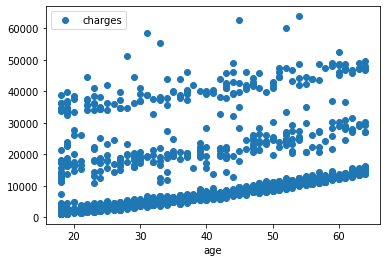

In [1018]:
dataset.plot(x='age', y='charges', style='o')
# plt.scatter(dataset['age'], dataset['charges'])
# plt.show()

print the correlation coefficients matrix

In [1019]:
dataset.corr()

,age,bmi,children,charges,rounded_bmi
age,1.000000,0.109272,0.042469,0.299008,0.109527
bmi,0.109272,1.000000,0.012759,0.198341,0.998920
children,0.042469,0.012759,1.000000,0.067998,0.013915
charges,0.299008,0.198341,0.067998,1.000000,0.198795
rounded_bmi,0.109527,0.998920,0.013915,0.198795,1.000000


# Phase 2: Preprocessing

## Sec 1: Handling Categorical Variables

using one-hot encoding, convert the `region` variable to some numerical variables (the result should be a dataframe)

In [1020]:
dataset_region = pd.get_dummies(dataset['region'], prefix='region')
dataset_region

,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


do the same thing for the `smoker` variable (the result should be a dataframe)

In [1021]:
dataset_smoker = pd.get_dummies(dataset['smoker'], prefix='smoker')
dataset_smoker

,smoker_no,smoker_yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1333,1,0
1334,1,0
1335,1,0
1336,1,0


do the same thing for the `sex` variable (the result should be a dataframe)

In [1022]:
dataset_sex = pd.get_dummies(dataset['sex'], prefix='sex')
dataset_sex

,sex_female,sex_male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


concatenate these new dataframes with the initial one using pandas

In [1023]:
preprocessing_dataset = pd.concat([dataset, dataset_region, dataset_sex, dataset_smoker], axis = 1)
preprocessing_dataset = preprocessing_dataset.drop(['sex', 'smoker', 'region'], axis=1)
preprocessing_dataset

,age,bmi,children,charges,rounded_bmi,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,28,0,0,0,1,1,0,0,1
1,18,33.770,1,1725.55230,34,0,0,1,0,0,1,1,0
2,28,33.000,3,4449.46200,33,0,0,1,0,0,1,1,0
3,33,22.705,0,21984.47061,23,0,1,0,0,0,1,1,0
4,32,28.880,0,3866.85520,29,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,31,0,1,0,0,0,1,1,0
1334,18,31.920,0,2205.98080,32,1,0,0,0,1,0,1,0
1335,18,36.850,0,1629.83350,37,0,0,1,0,1,0,1,0
1336,21,25.800,0,2007.94500,26,0,0,0,1,1,0,1,0


## Sec 2: Normalization

normalize the columns `age`, `bmi`, and `children` | after this, they should take values between 0 and 1

In [1024]:
min_max_scaler = preprocessing.MinMaxScaler()
dataset_scaled = min_max_scaler.fit_transform(preprocessing_dataset[['age', 'bmi', 'children']])
preprocessing_dataset[['age', 'bmi', 'children']] = pd.DataFrame(dataset_scaled)
preprocessing_dataset

,age,bmi,children,charges,rounded_bmi,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_no,smoker_yes
0,0.021739,0.321227,0.0,16884.92400,28,0,0,0,1,1,0,0,1
1,0.000000,0.479150,0.2,1725.55230,34,0,0,1,0,0,1,1,0
2,0.217391,0.458434,0.6,4449.46200,33,0,0,1,0,0,1,1,0
3,0.326087,0.181464,0.0,21984.47061,23,0,1,0,0,0,1,1,0
4,0.304348,0.347592,0.0,3866.85520,29,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,10600.54830,31,0,1,0,0,0,1,1,0
1334,0.000000,0.429379,0.0,2205.98080,32,1,0,0,0,1,0,1,0
1335,0.000000,0.562012,0.0,1629.83350,37,0,0,1,0,1,0,1,0
1336,0.065217,0.264730,0.0,2007.94500,26,0,0,0,1,1,0,1,0


# Phase 3: Training

## Sec 1: Making X and Y

make a new dataframe by removing the following columns: "rounded_bmi", "charges" 
| note: do not remove the previous dataframe

In [1025]:
training_dataset = preprocessing_dataset.drop(['rounded_bmi', 'charges'], axis=1)
training_dataset

,age,bmi,children,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_no,smoker_yes
0,0.021739,0.321227,0.0,0,0,0,1,1,0,0,1
1,0.000000,0.479150,0.2,0,0,1,0,0,1,1,0
2,0.217391,0.458434,0.6,0,0,1,0,0,1,1,0
3,0.326087,0.181464,0.0,0,1,0,0,0,1,1,0
4,0.304348,0.347592,0.0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,0,1,0,0,0,1,1,0
1334,0.000000,0.429379,0.0,1,0,0,0,1,0,1,0
1335,0.000000,0.562012,0.0,0,0,1,0,1,0,1,0
1336,0.065217,0.264730,0.0,0,0,0,1,1,0,1,0


convert the new dataframe into a numpy array named "x"

In [1026]:
x = training_dataset.to_numpy()
x

array([[0.02173913, 0.3212268 , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.47914985, 0.2       , ..., 1.        , 1.        ,
        0.        ],
       [0.2173913 , 0.45843422, 0.6       , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.56201238, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.06521739, 0.26472962, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.93478261, 0.35270379, 0.        , ..., 0.        , 0.        ,
        1.        ]])

get the "charges" column from the previous dataframe and convert it to another numpy array named "y"

In [1027]:
y = preprocessing_dataset['charges'].to_numpy()
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

## Sec 2: Splitting the Data

divide the dataset into two portions in a way that 90% of the data belongs to the "training" set (called `x_train`, `y_train`) and the remaining belongs to the "testing" set (called `x_test`, `y_test`)

In [1028]:
# x_train, x_test = np.split(x, [int(0.9*len(x))])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
print("Train:", x_train)
print("Test:", x_test)
print(x_train.shape)

Train: [[0.7826087  0.66195857 0.6        ... 1.         0.         1.        ]
 [0.30434783 0.3992467  0.6        ... 1.         1.         0.        ]
 [0.91304348 0.39117568 0.         ... 0.         1.         0.        ]
 ...
 [0.2173913  0.2243745  1.         ... 1.         1.         0.        ]
 [0.13043478 0.47538337 0.8        ... 1.         1.         0.        ]
 [0.91304348 0.26311542 0.         ... 1.         1.         0.        ]]
Test: [[0.73913043 0.8283562  1.         ... 0.         1.         0.        ]
 [0.52173913 0.25127791 0.2        ... 0.         1.         0.        ]
 [0.7173913  0.56604789 0.         ... 1.         1.         0.        ]
 ...
 [0.73913043 0.7732042  0.6        ... 0.         1.         0.        ]
 [0.47826087 0.68496099 0.2        ... 0.         1.         0.        ]
 [0.13043478 0.4677159  0.         ... 0.         1.         0.        ]]
(1204, 11)


## Sec 3 (Optional): Linear Regression from Scratch

Complete this section with your code.

**hint**: 
- use pseudo inverse if matrix is not invertible.
- you can use `np.linalg`.

**note**:
- do **Phase 3:Sec 4** and **Phase 4:all sections** with this model also, then compare your results. 

In [1029]:
class CustomLinearRegression:
    """
    Fits it on data, then use predict to get results.
    """

    def __init__(self):
        self.weights = None
        self.bias = None
    
    def __add_zero(self, X):
      X = np.insert(X, 0, 1, axis = 1)
      return X

    def fit(self, X, y):
        """Fit the training data
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Training samples
        y : array-like, shape = [n_samples, n_target_values]
            Target values
        Returns
        -------
        self : object
        """

        X = self.__add_zero(X)
        n_samples, n_features = X.shape

        xtx_inverse = np.linalg.pinv(np.matmul(X.transpose(), X))
        final = np.matmul(np.matmul(xtx_inverse, X.transpose()), y)
        self.coef_ = final[1:]
        self.intercept_ = final[0]
        
        return self
    
    def predict(self, X):
        """ Predicts the value after the model has been trained.
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Test samples
        Returns
        -------
        Predicted value
        """
        
        y_pred = None
        """
        YOUR CODE
        """
        y_pred = np.matmul(X, self.coef_) + self.intercept_
        return y_pred
      
    def score(self, X, y):
        rss = ((y - self.predict(X))**2).sum()
        tss = ((y - y.mean())**2).sum()
        return 1 - (rss/tss)

## Sec 4: The real deal!

fit a linear regressor to the data. (Use both regressors - sklearn & from scratch - if you did previous part)

In [1030]:
lr = LinearRegression()
reg = lr.fit(x_train, y_train)
reg.score(x_train, y_train)

0.7390432570308783

**USING CUSTOM LINEAR REGRESSION**

In [1031]:
custom_lr = CustomLinearRegression()
custom_reg = custom_lr.fit(x_train, y_train)
custom_reg.score(x_train, y_train)

0.7390665677902195

get the coefficients of the variables

In [1032]:
reg.coef_

array([ 1.20242044e+04,  1.23922177e+04,  2.54305245e+03,  3.98694979e+17,
        3.98694979e+17,  3.98694979e+17,  3.98694979e+17, -8.09794188e+16,
       -8.09794188e+16, -2.08437326e+15, -2.08437326e+15])

**USING CUSTOM LINEAR REGRESSION**

In [1033]:
custom_reg.coef_

array([11921.82562477, 12671.22081847,  2568.31284604,  1456.78052393,
        1258.56860319,   617.79105357,   670.10878425,  2142.44945942,
        1860.79950552, -9644.77364089, 13648.02260584])

get the bias value associated with the model

In [1034]:
reg.intercept_

-3.156311867235783e+17

**USING CUSTOM LINEAR REGRESSION**

In [1035]:
custom_reg.intercept_

4003.248964945313

## Sec 5: Save/Load the model

Save

In [1036]:
filename = 'finalized_model.sav'
dump(reg, filename)

['finalized_model.sav']

Load

In [1037]:
reg = load(filename)
reg.coef_

array([ 1.20242044e+04,  1.23922177e+04,  2.54305245e+03,  3.98694979e+17,
        3.98694979e+17,  3.98694979e+17,  3.98694979e+17, -8.09794188e+16,
       -8.09794188e+16, -2.08437326e+15, -2.08437326e+15])

# Phase 4: Evaluation

predict the value of "y" for each "x" belonging to the "testing" set

In [1038]:
y_predicted = reg.predict(x_test)
y_predicted

array([18944.,  7232., 12608.,   768., 35968.,  3264., 13760.,  3776.,
       33024., 38784., 10432., 35520., 15680.,   960., 12544.,   -64.,
       32064., 15296.,  5760.,  5568., 13632.,  5376., 14336., 11200.,
       10560.,  4992.,   -64.,  3264., 26496.,  7232., 14400.,  6848.,
       28992.,  1408., 16192.,  8128., 26816., 16448., 10944., 33600.,
        3392.,  4032.,  3392., 17792.,  2368.,  9280., 29888.,  6016.,
        8256.,  4672., 10752., 28160.,  7360., 33408.,   256.,  4416.,
       12608., 27520.,  8896.,  6400., 15168.,  3456.,  2560., 37184.,
       31744., 28288., 11840., 35264.,  4160., 10368.,  8128.,  5952.,
       14400.,  9152., 14912., -1728.,  9280.,  4992., 33344.,  4928.,
       39296., 13248., 15168.,  3648.,  7616., 28992.,  9280.,  2240.,
       32896., 15872., 14720., 11584.,  5056., 14144., 26944., 11136.,
        6720.,  8128.,  1088., 10816., 33280., 27776.,  2752., 26880.,
        5440.,  5824., 36544., 13376., 13120.,  8256.,  1472., 10880.,
      

**USING CUSTOM LINEAR REGRESSION**

In [1039]:
y_predicted_custom = custom_reg.predict(x_test)
y_predicted_custom

array([18995.09718276,  7088.77698509, 12614.5154327 ,   840.26782797,
       35980.26802285,  3441.44073547, 13740.36243934,  3909.6277945 ,
       32982.11198732, 38777.80505364, 10345.49568094, 35577.88587571,
       15727.3452991 ,  1141.29505272, 12562.23270667,   104.96168473,
       31973.91835287, 15289.13963208,  5716.39858251,  5663.0401361 ,
       13606.3665931 ,  5467.48591335, 14296.59960615, 11336.7307241 ,
       10546.21609167,  5027.57575065,    72.57626698,  3371.99222462,
       26558.24455224,  7217.59741461, 14395.05027662,  6931.70368676,
       29064.08043512,  1455.67754549, 16203.76845323,  7999.84929675,
       26863.88967129, 16440.39514231, 10851.20448276, 33578.95470107,
        3594.18603408,  3978.62644141,  3431.62192962, 17846.34369859,
        2339.23800286,  9333.68329811, 29931.23292001,  6215.98683357,
        8094.02759297,  4695.26068382, 10711.58898101, 28147.49566551,
        7486.06842247, 33522.8772892 ,   253.25733367,  4463.97186451,
      

compute the mean squared error

In [1040]:
mean_squared_error(y_predicted, y_test)

32801311.3797882

**USING CUSTOM LINEAR REGRESSION**

In [1041]:
mean_squared_error(y_predicted_custom, y_test)

32696575.303729713

return the coefficient of determination of the prediction

In [1042]:
reg.score(x_test, y_test)

0.8248763118117739

**USING CUSTOM LINEAR REGRESSION**

In [1043]:
custom_reg.score(x_test, y_test)

0.8254354896968699

predict the value of "y" only for the last entry of the "testing" set

In [1044]:
reg.predict([x_test[-1]])[0]
# reg.predict([x_test[-1]])

5184.0

# Phase 5 (Optional): Submit your predictions to our Kaggle competition

Competition Link: https://www.kaggle.com/t/77b2fa437095401088e51c73956556ff<br>
You'll have to make a csv file containing two columns: `ID` and `charges`, and submit the file.<br>

In [1045]:
! pip install -q kaggle
from google.colab import files
files.upload()

{}

In [1046]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [1047]:
! kaggle competitions download -c 'sharif-ml-1401-c1'

sharif-ml-1401-c1.zip: Skipping, found more recently modified local copy (use --force to force download)


In [1048]:
!unzip sharif-ml-1401-c1.zip

Archive:  sharif-ml-1401-c1.zip
replace assignment1-test-data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: assignment1-test-data.csv  
  inflating: assignment1-training-data.csv  
  inflating: sample-submission.csv   


In [1049]:
#Read to dataframe
submission_dataset = pd.read_csv("assignment1-test-data.csv")
submission_dataset

,age,sex,bmi,children,smoker,region,ID
0,37,female,30.478194,1,no,southeast,1
1,34,female,46.052982,2,no,southeast,2
2,63,male,40.342375,0,no,southeast,3
3,51,female,28.427689,0,no,southwest,4
4,25,male,16.891723,0,no,northwest,5
...,...,...,...,...,...,...,...
95,53,female,28.673546,1,no,northwest,96
96,38,male,28.637839,4,no,southwest,97
97,53,female,22.065359,3,no,southwest,98
98,18,male,26.012596,0,yes,southwest,99


In [1050]:
#One hot encoding
submission_dataset = pd.get_dummies(submission_dataset, columns=['sex', 'smoker', 'region'])
submission_dataset

,age,bmi,children,ID,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,37,30.478194,1,1,1,0,1,0,0,0,1,0
1,34,46.052982,2,2,1,0,1,0,0,0,1,0
2,63,40.342375,0,3,0,1,1,0,0,0,1,0
3,51,28.427689,0,4,1,0,1,0,0,0,0,1
4,25,16.891723,0,5,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,53,28.673546,1,96,1,0,1,0,0,1,0,0
96,38,28.637839,4,97,0,1,1,0,0,0,0,1
97,53,22.065359,3,98,1,0,1,0,0,0,0,1
98,18,26.012596,0,99,0,1,0,1,0,0,0,1


In [1051]:
#Normalize
min_max_scaler = preprocessing.MinMaxScaler()
dataset_scaled = min_max_scaler.fit_transform(submission_dataset[['age', 'bmi', 'children']])
submission_dataset[['age', 'bmi', 'children']] = pd.DataFrame(dataset_scaled)
submission_dataset

,age,bmi,children,ID,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.434783,0.445223,0.2,1,1,0,1,0,0,0,1,0
1,0.369565,0.955602,0.4,2,1,0,1,0,0,0,1,0
2,1.000000,0.768468,0.0,3,0,1,1,0,0,0,1,0
3,0.739130,0.378029,0.0,4,1,0,1,0,0,0,0,1
4,0.173913,0.000000,0.0,5,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.782609,0.386085,0.2,96,1,0,1,0,0,1,0,0
96,0.456522,0.384915,0.8,97,0,1,1,0,0,0,0,1
97,0.782609,0.169538,0.6,98,1,0,1,0,0,0,0,1
98,0.021739,0.298887,0.0,99,0,1,0,1,0,0,0,1


In [1052]:
#Create the dataframe to submit
final_df = submission_dataset[['ID']].copy()
final_df
# reg.feature_names_in_

,ID
0,1
1,2
2,3
3,4
4,5
...,...
95,96
96,97
97,98
98,99


In [1053]:
#Create x
cols = training_dataset.columns
submission_dataset = submission_dataset.drop('ID', axis=1)
submission_dataset = submission_dataset[cols]
submission_dataset

,age,bmi,children,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_no,smoker_yes
0,0.434783,0.445223,0.2,0,0,1,0,1,0,1,0
1,0.369565,0.955602,0.4,0,0,1,0,1,0,1,0
2,1.000000,0.768468,0.0,0,0,1,0,0,1,1,0
3,0.739130,0.378029,0.0,0,0,0,1,1,0,1,0
4,0.173913,0.000000,0.0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
95,0.782609,0.386085,0.2,0,1,0,0,1,0,1,0
96,0.456522,0.384915,0.8,0,0,0,1,0,1,1,0
97,0.782609,0.169538,0.6,0,0,0,1,1,0,1,0
98,0.021739,0.298887,0.0,0,0,0,1,0,1,0,1


In [1054]:
#Predict
sub_predicted = reg.predict(submission_dataset.values)
final_df['charges'] = pd.Series(sub_predicted)
final_df

,ID,charges
0,1,8512.0
1,2,14528.0
2,3,18496.0
3,4,10880.0
4,5,-448.0
...,...,...
95,96,12544.0
96,97,9280.0
97,98,10368.0
98,99,24256.0


In [1055]:
final_df.to_csv('98103867_sub.csv', index=False)

In [1057]:
!kaggle competitions submit -c 'sharif-ml-1401-c1' -f '98103867_sub.csv' -m "New Submission"

100% 1.03k/1.03k [00:03<00:00, 297B/s]
400 - Bad Request
